In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy

D:\Applications\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.11.0


In [3]:
imdb = keras.datasets.imdb

(train_data1, train_labels1), (test_data1, test_labels1) = imdb.load_data(num_words=100000)

In [4]:
print("Training entries: {}, labels: {}".format(len(train_data1), len(train_labels1)))

Training entries: 25000, labels: 25000


In [5]:
# Gives the length of the number of words that are present in the movie review. The number is the key of each word that is
# present in the dictionary created.

print(train_data1[0])
print(train_data1.shape)
print(type(train_data1))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(25000,)
<class 'numpy.ndarray'>


In [6]:
len(train_data1[0]), len(train_data1[1])

(218, 189)

In [7]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# sorted(word_index, key=word_index.get)
len(word_index)

88584

**To create a dictionary with the words, first take all the elements in the complete dataset, get the unique words without lemmatization or stemming. After getting the unique words, create a dictionary with the unique words.**

**After creating the dictionary of unique words, replace the data with the key values in the dataset**

In [8]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [9]:
length = []
for data in train_data1:
    length.append(len(data))
print(max(length))

2494


In [10]:
decode_review(train_data1[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [11]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data1,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data1,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [12]:
train_data[0]

array([    1,    14,    22,    16,    43,   530,   973,  1622,  1385,
          65,   458,  4468,    66,  3941,     4,   173,    36,   256,
           5,    25,   100,    43,   838,   112,    50,   670, 22665,
           9,    35,   480,   284,     5,   150,     4,   172,   112,
         167, 21631,   336,   385,    39,     4,   172,  4536,  1111,
          17,   546,    38,    13,   447,     4,   192,    50,    16,
           6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
         469,     4,    22,    71,    87,    12,    16,    43,   530,
          38,    76,    15,    13,  1247,     4,    22,    17,   515,
          17,    12,    16,   626,    18, 19193,     5,    62,   386,
          12,     8,   316,     8,   106,     5,     4,  2223,  5244,
          16,   480,    66,  3785,    33,     4,   130,    12,    16,
          38,   619,     5,    25,   124,    51,    36,   135,    48,
          25,  1415,    33,     6,    22,    12,   215,    28,    77,
          52,     5,

In [13]:
embeddings = tf.Variable(
    tf.random_uniform([10000, 256], -1.0, 1.0))

In [14]:
embeddings

<tf.Variable 'Variable:0' shape=(10000, 256) dtype=float32_ref>

In [15]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 100000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          1600000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,600,289
Trainable params: 1,600,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss="binary_crossentropy", metrics=['accuracy'])

In [17]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels1[:10000]
partial_y_train = train_labels1[10000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

Train on 15000 samples, validate on 10000 samples
Epoch 1/25
 - 1s - loss: 0.6918 - acc: 0.6044 - val_loss: 0.6897 - val_acc: 0.7181
Epoch 2/25
 - 1s - loss: 0.6851 - acc: 0.7611 - val_loss: 0.6806 - val_acc: 0.7251
Epoch 3/25
 - 1s - loss: 0.6706 - acc: 0.7890 - val_loss: 0.6625 - val_acc: 0.7640
Epoch 4/25
 - 1s - loss: 0.6437 - acc: 0.7854 - val_loss: 0.6337 - val_acc: 0.7948
Epoch 5/25
 - 1s - loss: 0.6036 - acc: 0.8245 - val_loss: 0.5935 - val_acc: 0.8027
Epoch 6/25
 - 1s - loss: 0.5534 - acc: 0.8404 - val_loss: 0.5489 - val_acc: 0.8083
Epoch 7/25
 - 1s - loss: 0.4988 - acc: 0.8592 - val_loss: 0.5033 - val_acc: 0.8294
Epoch 8/25
 - 1s - loss: 0.4451 - acc: 0.8751 - val_loss: 0.4603 - val_acc: 0.8405
Epoch 9/25
 - 1s - loss: 0.3951 - acc: 0.8873 - val_loss: 0.4228 - val_acc: 0.8524
Epoch 10/25
 - 1s - loss: 0.3508 - acc: 0.9019 - val_loss: 0.3920 - val_acc: 0.8602
Epoch 11/25
 - 1s - loss: 0.3136 - acc: 0.9095 - val_loss: 0.3688 - val_acc: 0.8657
Epoch 12/25
 - 1s - loss: 0.2826 - 

In [19]:
results = model.evaluate(test_data, test_labels1)

print(results)

25000/25000 [==============================] - 0s 20us/step
[0.30104855069160463, 0.87668]


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

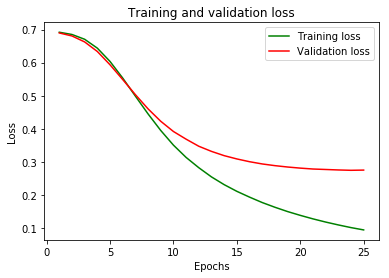

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

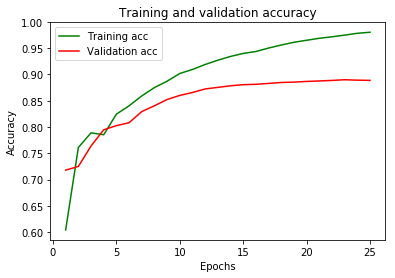

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()